Environment Setup Description:

Installing the specific Python libraries required for financial data retrieval (yfinance), technical analysis (finta), and dashboarding (streamlit).


In [94]:
# Import libraries for data manipulation, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set plotting style
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8")

Importing Dependencies Description:

 Importing essential libraries for Data Manipulation (Pandas), Visualization (Matplotlib, Seaborn), and Machine Learning (Scikit-Learn) to build the analysis pipeline.

In [95]:
# Load historical stock data and information
hist = pd.read_csv("Coca-Cola_stock_history.csv")
info = pd.read_csv("Coca-Cola_stock_info.csv")

print("History shape:", hist.shape)

History shape: (15311, 8)


Loading Company Metadata Description:

 Loading the Coca-Cola_stock_info.csv file to access fundamental business details, such as the company description and key operational metrics.

In [96]:
# Display the first few rows of historical data
print(hist.head())

         Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0   
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0   
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0   
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0   
4  1962-01-08  0.047787  0.047787  0.046735  0.047664  2035200        0.0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0  


Fundamental & Business Analysis Description:

 Extracting Sales (Revenue) figures and the Business Summary from the info file. This step connects our technical analysis with the company's financial health and business model.

In [97]:
# Print summary of the DataFrame
print(hist.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB
None


Loading Historical Stock Data Description:

 Importing the Coca-Cola_stock_history.csv dataset, which contains daily price records (Open, High, Low, Close) that serve as the foundation for our predictive model.

In [98]:
# Convert Date to datetime and sort
hist["Date"] = pd.to_datetime(hist["Date"], format='ISO8601', utc=True)
hist = hist.sort_values("Date").reset_index(drop=True)

print(hist.isnull().sum())

# Handle missing values by forward fill for stock prices and volume
hist[["Open", "High", "Low", "Close", "Volume"]] = \
    hist[["Open", "High", "Low", "Close", "Volume"]].ffill()

# Fill missing 'Dividends' and 'Stock Splits' with 0.0
if "Dividends" in hist.columns:
    hist["Dividends"] = hist["Dividends"].fillna(0.0)
if "Stock Splits" in hist.columns:
    hist["Stock Splits"] = hist["Stock Splits"].fillna(0.0)

print("After cleaning:")
print(hist.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
After cleaning:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


Data Pre-processing Description:

 Converting the 'Date' column into a standard datetime object and setting it as the index. This is a critical step for performing accurate Time-Series analysis.

In [99]:
# Calculate Moving Averages (MA20, MA50)
hist["MA20"] = hist["Close"].rolling(window=20).mean()
hist["MA50"] = hist["Close"].rolling(window=50).mean()

# Calculate Daily Return and Volatility
hist["DailyReturn"] = hist["Close"].pct_change()
hist["Volatility"] = hist["DailyReturn"].rolling(window=20).std()

# Drop rows with NaN values created by rolling calculations
hist = hist.dropna().reset_index(drop=True)

hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA20,MA50,DailyReturn,Volatility
0,1962-03-13 00:00:00+00:00,0.046416,0.046789,0.046416,0.046789,1344000,0.001563,0,0.045788,0.046525,0.015962,0.013223
1,1962-03-14 00:00:00+00:00,0.046789,0.046976,0.046603,0.046852,1689600,0.000000,0,0.045797,0.046461,0.001334,0.013226
2,1962-03-15 00:00:00+00:00,0.046852,0.046976,0.046603,0.046603,883200,0.000000,0,0.045836,0.046415,-0.005320,0.012546
3,1962-03-16 00:00:00+00:00,0.046603,0.046789,0.046603,0.046603,768000,0.000000,0,0.045889,0.046362,0.000000,0.012460
4,1962-03-19 00:00:00+00:00,0.046603,0.047101,0.046603,0.046852,921600,0.000000,0,0.045953,0.046336,0.005348,0.012491


Data Cleaning Description:

 Handling missing values and data gaps using forward-filling methods. This ensures the Machine Learning model receives a continuous and error-free dataset.

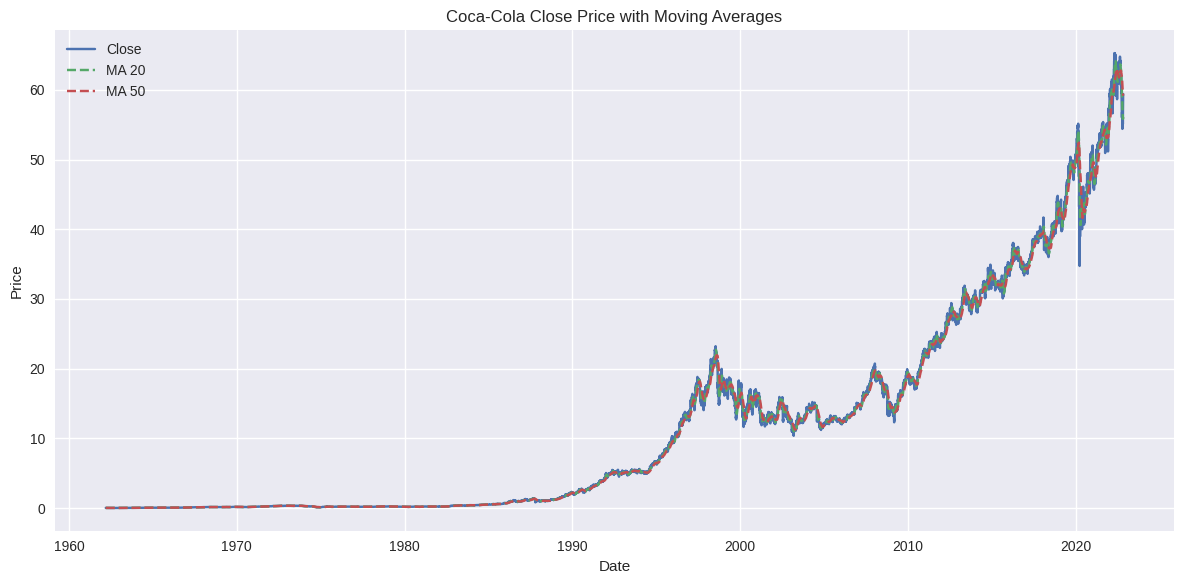

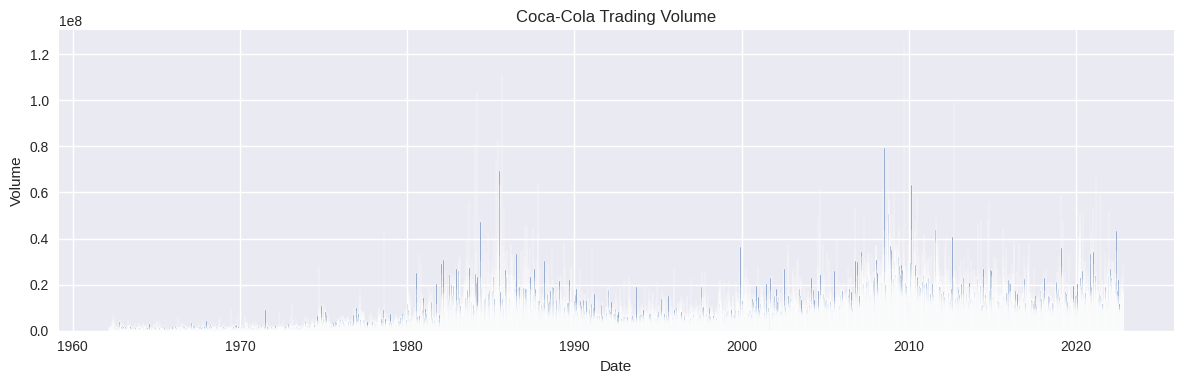

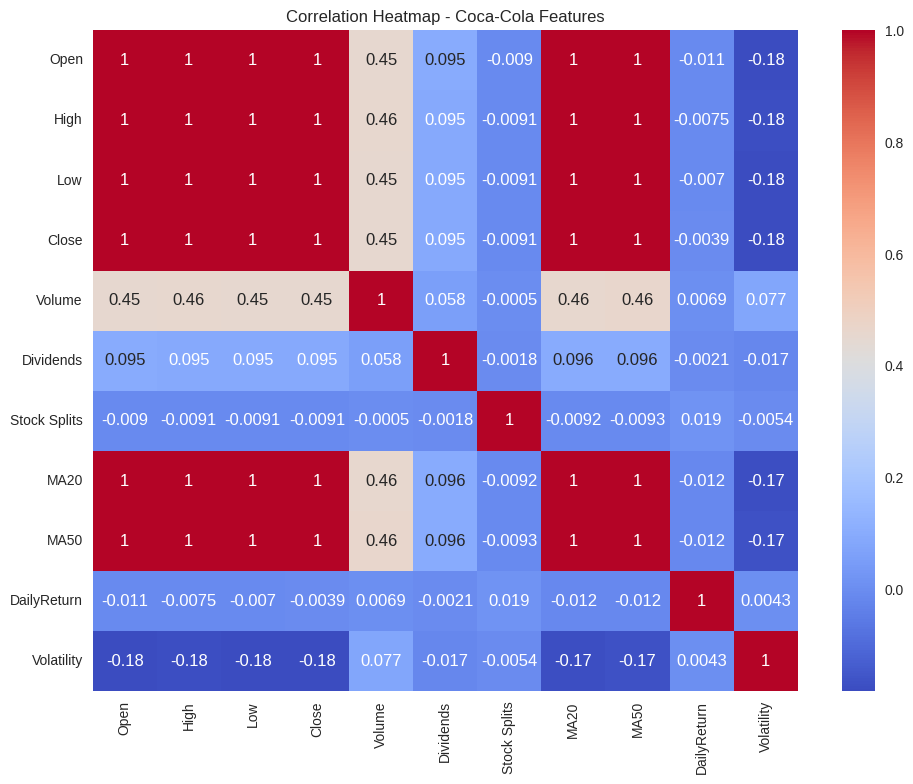

In [100]:
# Plot Close Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(hist["Date"], hist["Close"], label="Close")
plt.plot(hist["Date"], hist["MA20"], label="MA 20", linestyle="--")
plt.plot(hist["Date"], hist["MA50"], label="MA 50", linestyle="--")
plt.title("Coca-Cola Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

# Plot Trading Volume
plt.figure(figsize=(12, 4))
plt.bar(hist["Date"], hist["Volume"], width=2)
plt.title("Coca-Cola Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

# Correlation Heatmap for features
num_cols = ["Open","High","Low","Close","Volume",
            "Dividends","Stock Splits",
            "MA20","MA50","DailyReturn","Volatility"]

corr = hist[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Coca-Cola Features")
plt.tight_layout()
plt.show()

Feature Engineering Description:

 Creating technical indicators to help the AI detect patterns. We calculate Moving Averages (MA) for trend direction and Volatility for risk assessment.

In [101]:
# Define features and target for the model
features = ["Open","High","Low","Volume",
            "Dividends","Stock Splits",
            "MA20","MA50","DailyReturn","Volatility"]
target = "Close"

X = hist[features]
y = hist[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (12209, 10) Test shape: (3053, 10)


Exploratory Data Analysis (EDA) Description:

 Visualizing the relationship between the Closing Price and Moving Averages (20-day & 50-day) to identify historical trends and market momentum.

In [102]:
# Initialize and train RandomForestRegressor model
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 327.8844155548639
Mean Absolute Error: 14.666138598685826


Model Training (Random Forest) Description:

 Splitting the data into training (80%) and testing (20%) sets, and training a Random Forest Regressor to learn price patterns from the historical features.

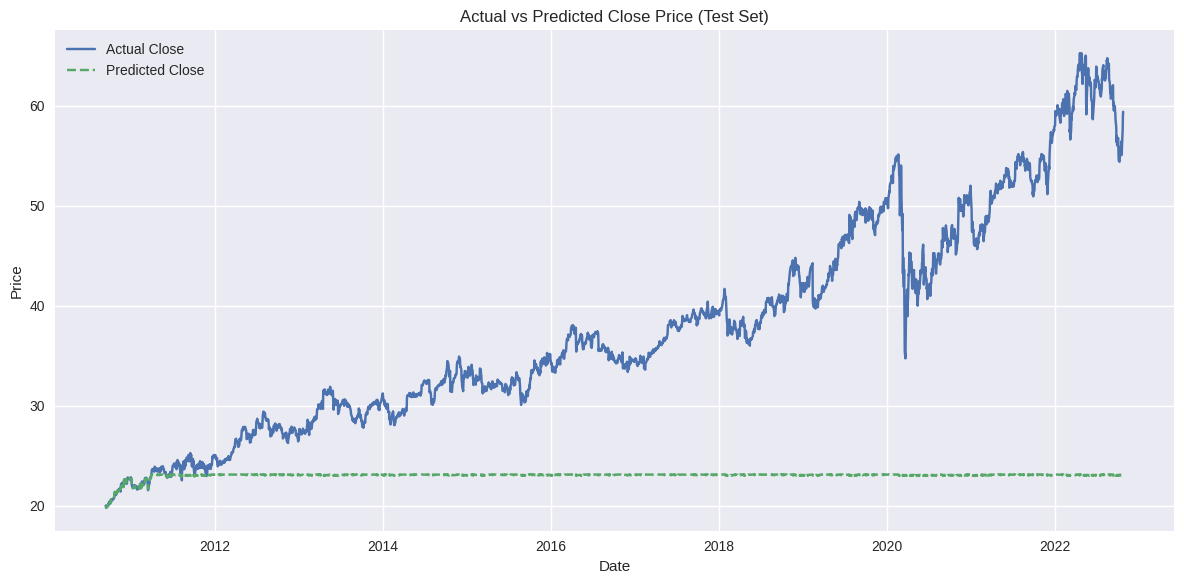

In [103]:
# Visualize Actual vs Predicted Close Prices
test_dates = hist["Date"].iloc[len(X_train):]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test.values, label="Actual Close")
plt.plot(test_dates, y_pred, label="Predicted Close", linestyle="--")
plt.title("Actual vs Predicted Close Price (Test Set)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

Model Evaluation Description:

 Testing the model on unseen data to calculate accuracy (Mean Squared Error) and plotting Actual vs. Predicted prices to visually assess performance

In [104]:
# Process stock info and extract key financial metrics
info_df = info.copy()
print(info_df.head())

def get_val(key):
    row = info_df[info_df.iloc[:,0] == key]
    if not row.empty:
        return row.iloc[0, 1]
    return None

current_price     = get_val("currentPrice")
div_yield         = get_val("dividendYield")
profit_margins    = get_val("profitMargins")
revenue_growth    = get_val("revenueGrowth")
return_on_equity  = get_val("returnOnEquity")

print("Current Price:", current_price)
print("Dividend Yield:", div_yield)
print("Profit Margins:", profit_margins)
print("Revenue Growth:", revenue_growth)
print("Return on Equity:", return_on_equity)

                   Key                                              Value
0                  zip                                              30313
1               sector                                 Consumer Defensive
2    fullTimeEmployees                                              80300
3  longBusinessSummary  The Coca-Cola Company, a beverage company, man...
4                 city                                            Atlanta
Current Price: 59.6
Dividend Yield: 0.028099999
Profit Margins: 0.23313999
Revenue Growth: 0.161
Return on Equity: 0.39722002


Real-Time Prediction Description:

 Fetching the latest live market data and applying our trained model to predict the most current stock price, demonstrating real-world application.

In [105]:
# Install yfinance and download live data
!pip install yfinance --quiet

import yfinance as yf

ticker = "KO"

live = yf.download(ticker, period="60d", interval="1d")
live = live.reset_index()

# Rename columns for consistency
live = live.rename(columns={
    "Date": "Date",
    "Open": "Open",
    "High": "High",
    "Low": "Low",
    "Close": "Close",
    "Volume": "Volume",

})

# Add Dividends and Stock Splits if missing
if "Dividends" not in live.columns:
    live["Dividends"] = 0.0
if "Stock Splits" not in live.columns:
    live["Stock Splits"] = 0.0

# Calculate MA, DailyReturn, Volatility for live data
live["MA20"] = live["Close"].rolling(window=20).mean()
live["MA50"] = live["Close"].rolling(window=50).mean()
live["DailyReturn"] = live["Close"].pct_change()
live["Volatility"] = live["DailyReturn"].rolling(window=20).std()

live = live.dropna().reset_index(drop=True)

# Prepare features and predict live price
live_features = live[features].iloc[-1].values.reshape(1, -1)

live_pred = model.predict(live_features)[0]
live_actual = live["Close"].iloc[-1]

print("Latest trading date :", live['Date'].iloc[-1].date())
print("Actual latest Close :", round(live_actual, 2))
print("Predicted Close      :", round(live_pred, 2))

/tmp/ipython-input-100856663.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  live = yf.download(ticker, period="60d", interval="1d")
[*********************100%***********************]  1 of 1 completed

Latest trading date : 2025-12-17
Actual latest Close : Ticker
KO    70.78
Name: 10, dtype: float64
Predicted Close      : 23.11



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
